# Курсовая работа по машинному обучению

**6 ВАРИАНТ**

Выполнил: Мельников Иван, ШЦТ-211

**Набор данных: Dataset 2**

Комплексное исследование по поведению во время ежедневных поездок. Целью этого проекта
является прогнозирование предпочтительного способа передвижения (например, автомобиль,
велосипед, общественный транспорт) на основе личных и бытовых характеристик, включая
местоположение рабочего места и дома.

**Дополнительные условия:**

KAFSTV(Distance class trip) до 10 км

**Моделируемая величина:**

'KHVM' (Main transport mode class trip)

In [ ]:
# python ver=13.3

# работа с данными
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# выбор моделей
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# импорт метрик
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Интерпритация результатов
import eli5
from eli5.sklearn import PermutationImportance
# import shap
import lime
import lime.lime_tabular

ModuleNotFoundError: No module named 'shap'

In [229]:
pd.set_option('display.max_rows', 10)
data = pd.read_csv('Dataset_2_DATA.csv', sep=',')
data

,HHID,PERSID,VPLID,RitID,HH_VALID,P_VALID,KHVM,WEGGEWEEST,VERTREKP,AANTVPL,...,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
0,30055622,3005562201,13957101,1395710101,2,3,2,1,2,2,...,3,1,0,0,1,0,0,1,0,1
1,30055622,3005562201,13957102,1395710201,2,3,2,1,2,2,...,3,1,0,0,1,0,0,1,0,1
2,30055622,3005562201,13957201,1395720101,2,3,1,1,2,4,...,3,1,0,0,1,0,0,1,0,1
3,30055622,3005562201,13957202,1395720201,2,3,1,1,2,4,...,3,1,0,0,1,0,0,1,0,1
4,30204076,3020407601,14445303,1444530301,2,3,8,1,1,3,...,2,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7305,30862294,3086229401,19042304,1904230401,2,3,2,1,2,12,...,1,1,0,0,0,0,0,1,0,0
7306,30862294,3086229401,19042103,1904210301,2,3,7,1,2,5,...,1,1,0,0,0,0,0,1,0,0
7307,30862294,3086229401,19042104,1904210401,2,3,7,1,2,5,...,1,1,0,0,0,0,0,1,0,0
7308,30862294,3086229401,19042201,1904220101,2,3,1,1,2,3,...,1,1,0,0,0,0,0,1,0,0


In [230]:
data_desc = pd.read_csv('Dataset_2_DESCRIPTION.csv', sep=',', encoding='latin-1')
data_desc

,Variable,Var_description,Value,Label,Measurement_level,BaseData_Type,Name_BaseData,Filter_Variables
0,PERSOON,new person,0,no new person,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1
1,PERSOON,new person,1,new person,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1
2,HHID,Unique Household ID,999999999,Input,Scale,Mobility,MPNWAVE6_DAGBOEKdata,1
3,PERSID,Unique ID of Person,999999999,Unique ID of Person,Scale,Mobility,MPNWAVE6_DAGBOEKdata,1
4,HH_VALID,Complete household yes or no,0,"Not a complete household, not all persons comp...",Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1
...,...,...,...,...,...,...,...,...
1054,tramhalte,Straight line distance between nearest tram st...,999999999,Straight line distance between nearest tram st...,Scale,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,0
1055,bushalte4xpu,Straight line distance between nearest bus sto...,999999999,Straight line distance between nearest bus sto...,Scale,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,0
1056,bushalte2xpu,Straight line distance between nearest bus sto...,999999999,Straight line distance between nearest bus sto...,Scale,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,0
1057,bushalte1xpu,Straight line distance between nearest bus sto...,999999999,Straight line distance between nearest bus sto...,Scale,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,0


В переменной data находятся результаты опроса людей.

В переменной data_desc находятся фичи из таблицы data и их объяснение.

# Смотрим данные (начало EDA)

**Признаки ID**
*   HHID - айди дома
*   PERSID - ID человека
*   VPLID - ID поездки
*   RitID - В метаданных написано, что это \<None>

In [231]:
data.groupby('PERSID').size()

PERSID
3001044102    10
3001044104     8
3001136701    22
3001136702    18
3001224501    14
              ..
6000029204    10
6000030401     7
6000030801    24
6000033701    26
6000035501    12
Length: 676, dtype: int64

In [232]:
data.groupby('PERSID').size().sort_values()

PERSID
3062976701     1
3062976702     1
3082593301     1
3003199001     2
3005417902     2
              ..
6000027701    33
3087982601    36
3082919804    37
3061385002    37
3087723801    40
Length: 676, dtype: int64

Можно заметить, что лишь 3 человека прошли опрос один раз. Все остальные опрошенные участвовали в опросе по несколько раз.
Человек, прошедший опрос больше всех, прошёл его целых 40 раз. Давайте посмотрим на него.

In [233]:
data[data['PERSID'] == 3087723801]

,HHID,PERSID,VPLID,RitID,HH_VALID,P_VALID,KHVM,WEGGEWEEST,VERTREKP,AANTVPL,...,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
4111,30877238,3087723801,20142109,2014210901,2,3,1,1,1,4,...,1,1,0,0,0,0,0,1,0,0
4394,30877238,3087723801,20142110,2014211001,2,3,1,1,1,4,...,1,1,0,0,0,0,0,1,0,0
4401,30877238,3087723801,20142105,2014210501,2,3,3,1,1,4,...,1,1,0,0,0,0,0,1,0,0
4402,30877238,3087723801,20142105,2014210502,2,3,3,1,1,4,...,1,1,0,0,0,0,0,1,0,0
4403,30877238,3087723801,20142105,2014210503,2,3,3,1,1,4,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,30877238,3087723801,20142301,2014230102,2,3,3,1,1,2,...,1,1,0,0,0,0,0,1,0,0
6645,30877238,3087723801,20142301,2014230103,2,3,3,1,1,2,...,1,1,0,0,0,0,0,1,0,0
6646,30877238,3087723801,20142301,2014230104,2,3,3,1,1,2,...,1,1,0,0,0,0,0,1,0,0
6647,30877238,3087723801,20142301,2014230105,2,3,3,1,1,2,...,1,1,0,0,0,0,0,1,0,0


In [234]:
data.groupby('PERSID').size().mean()

np.float64(10.81360946745562)

Столько люди проходили опрос в среднем.

Мы могли бы удалить результаты опросников, в которых люди повторно отвечали на вопросы, но тогда у нас количество измерений заметно упадёт. Давайте тогда будем считать, что каждый объект - отдельная единица данных, которая независима от других.

In [235]:
data.groupby('HHID').size().unique(), data.groupby('VPLID').size().unique(), data.groupby('RitID').size().unique()

(array([18, 40, 22, 10, 41, 24,  4, 23, 12,  2, 17, 14, 13,  9, 33,  5, 19,
        16,  6,  8, 15, 28, 11, 20,  3, 34, 21, 25, 56, 45, 49, 29, 27, 50,
         7, 36, 43, 32, 51, 30, 37, 38, 39, 59, 35, 78,  1, 26, 81, 46, 53,
        48, 31, 47, 58, 64, 57]),
 array([1, 3, 2, 5, 4, 6, 7, 9]),
 array([1]))

Также давайте сделаем и с другими ID.

HHID - ID дома может повторяться, так как у нас люди проходили опрос по несколько раз.

VPLID - ID поездок повторяются максимум 9 раз. Это значит, что максимум людей, находящихся на одном транспортном средстве (ТС) и прошедших опрос, 9.

RitID - неизвестно, что это за признак, так что давайте посмотрим на него

In [236]:
data.groupby('HHID').size().sort_values()

HHID
30825933     1
30056138     2
30864892     2
30872538     2
30799982     2
            ..
60000191    58
30613850    59
60000257    64
30774743    78
30829198    81
Length: 416, dtype: int64

In [237]:
data[data['HHID'] == 30829198].groupby('PERSID').count()

,HHID,VPLID,RitID,HH_VALID,P_VALID,KHVM,WEGGEWEEST,VERTREKP,AANTVPL,VPLDAGNR,...,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
PERSID,,,,,,,,,,,,,,,,,,,,,
3082919801,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
3082919802,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
3082919803,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
3082919804,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
3082919805,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


Это дом, который больше всех внёс вклад в опрос. Как видим, в нём живёт несколько людей.

In [238]:
data[data['HHID'] == 30829198].groupby('VPLID').count().sort_values(by='KHVM')

,HHID,PERSID,RitID,HH_VALID,P_VALID,KHVM,WEGGEWEEST,VERTREKP,AANTVPL,VPLDAGNR,...,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
VPLID,,,,,,,,,,,,,,,,,,,,,
13459101,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13459103,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13459105,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13459107,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13459108,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13462202,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
13462302,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
13462301,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Отсюда мы видим, что есть люди из одного дома, совершавшие поездки вместе.

In [239]:
data.groupby('RitID').size().sort_values()

RitID
2169120401    1
2169120301    1
2169120203    1
2169120202    1
2169120201    1
             ..
2169130501    1
2169130601    1
2169130602    1
2169130603    1
1306810101    1
Length: 7310, dtype: int64

RitID для каждой строчки - одинаковый. Скорее всего, это ID результатов опроса.

Давайте дополнительно посмотрим, сколько поездок затронул опрос.

In [240]:
data.groupby('VPLID').size().count()

np.int64(5915)

Посмотрим на распределение видов транспорта.

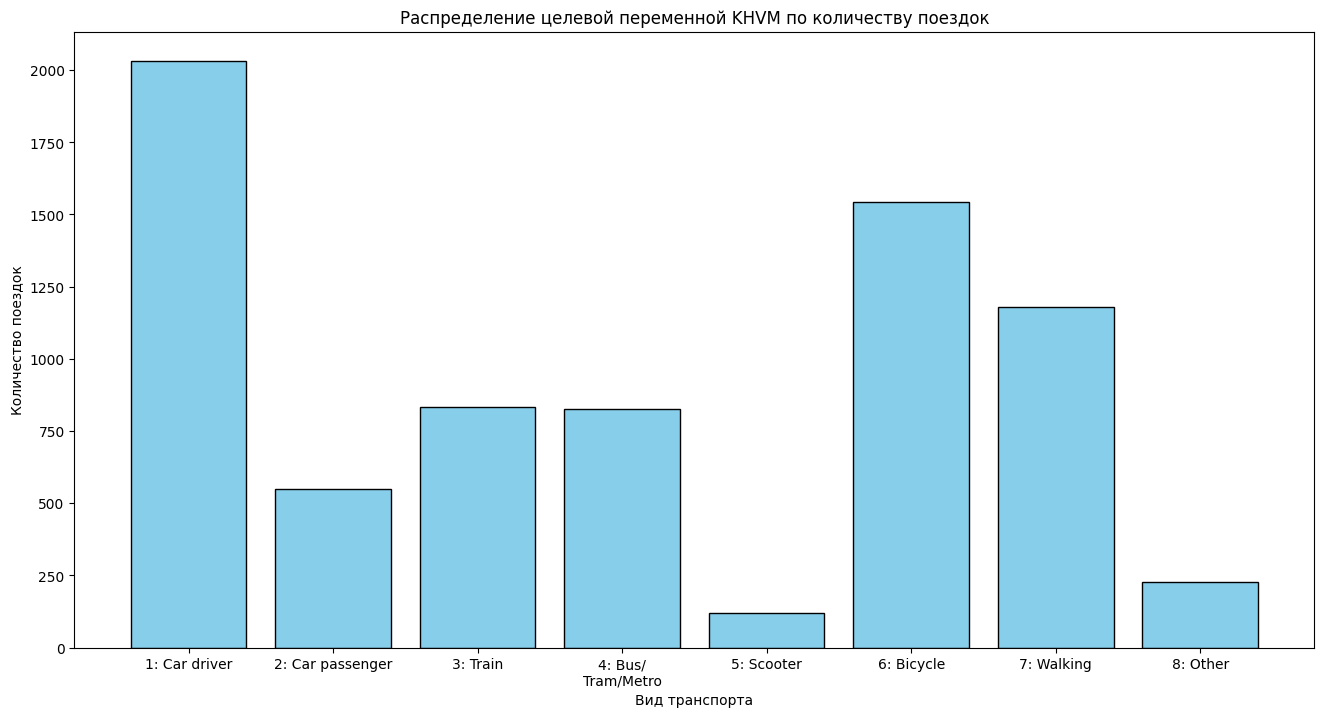

In [ ]:
plt.figure(figsize=(16, 8))

khvm_count = data['KHVM'].value_counts()

plt.bar(khvm_count.index, khvm_count.values, color='skyblue', edgecolor='black')

plt.xticks(ticks=range(1, 9),
    labels=["1: Car driver", "2: Car passenger", "3: Train", "4: Bus/\nTram/Metro",
        "5: Scooter", "6: Bicycle", "7: Walking", "8: Other"], rotation=0)

plt.title('Распределение целевой переменной KHVM по количеству поездок')
plt.xlabel('Вид транспорта')
plt.ylabel('Количество поездок')
# plt.savefig("KHVM_diff.png", bbox_inches='tight')
plt.show()

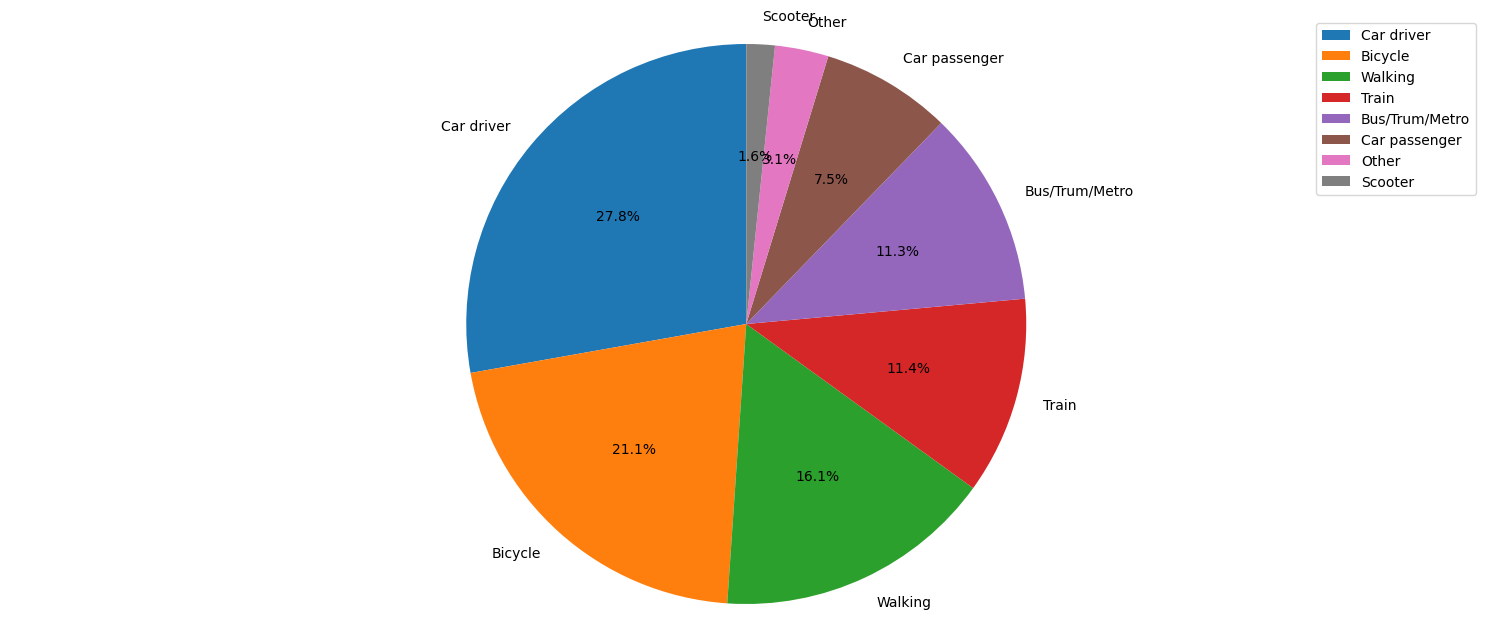

In [ ]:
# pie_data = {'Уровень': data['KHVM'].value_counts().sort_values(ascending=False).index, 'Значение': data['KHVM'].value_counts()}
# pie_data = pd.DataFrame(pie_data)

# pie_data.plot.pie(y='Значение', labels=['Car driver', 'Bicycle', 'Walking', 'Train', 'Bus/Trum/Metro', 'Car passenger', 'Other', 'Scooter'],
#                   autopct='%1.1f%%', startangle=90)
fig, ax = plt.subplots(figsize=(19, 8))
ax.pie(data['KHVM'].value_counts(), labels=['Car driver', 'Bicycle', 'Walking', 'Train', 'Bus/Trum/Metro', 'Car passenger', 'Other', 'Scooter'],
                  autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend()
# plt.savefig("KHVM_proportion.png", bbox_inches='tight')
plt.show()

Мы видим несбалансированность признаков по целевой переменной. Нужно будет аккуратнее создавать модели.

# Этап EDA

### Обработка фичей

**Признаки ID**
*   HHID - айди дома
*   PERSID - ID человека
*   VPLID - ID поездки
*   RitID - в метаданных написано, что это \<None>; будем предполагать, что это ID результата опроса

In [149]:
for column in data.columns:
    if data[column].nunique() <= 1:
        print(column, '-', data[column].nunique(), 'уникальное значение и это:', data[column].unique()[0])

HH_VALID - 1 уникальное значение и это: 2
P_VALID - 1 уникальное значение и это: 3
WEGGEWEEST - 1 уникальное значение и это: 1


* HH_VALID - 'Complete household yes or no'. 2 означает, что человек 'completed household'
* P_VALID - то, как пользователь ответил на опросник. 3 означает, что человек пользователи ответили на все вопросы
* WEGGEWEEST - Путешествовал ли сегодня человек. 1 означает, что пользователь совершил поездку в этот день

Данные фичи никак не повлияют на работу нашей модели, так как они могут принимать лишь по одному значению. Поэтому мы можем их удалить.

In [150]:
data.drop('P_VALID', axis=1, inplace=True)
data.drop('HH_VALID', axis=1, inplace=True)
data.drop('WEGGEWEEST', axis=1, inplace=True)

### Приведение всех данных в тип int64

In [151]:
data.dtypes.value_counts()

int64     51
object     2
Name: count, dtype: int64

Видим, что 2 признака являются объектами

In [152]:
data.select_dtypes(include=('object'))

,KREISDUUR,PARKEERKOSTEN
0,11,0
1,8,0
2,7,0
3,5,0
4,11,0
...,...,...
7305,3,0
7306,2,0
7307,2,0
7308,6,0


* KREISDUUR - класс, к которому относится длительность поездки
* PARKEERKOSTEN - класс, к которому относится величина платы за парковку автомобиля

Видим, что данные числовые. Значит, можем их преобразовать в числовой тип. Но давайте сначала исследуем эти признаки.

In [153]:
pd.DataFrame(data['KREISDUUR'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
0,11,8,7,5,4,10,9,3,6,2,,1


In [154]:
pd.DataFrame(data['PARKEERKOSTEN'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,16,9,3,11,,13,5,4,2,14,12,10,7,6,1,8


Есть объекты, у которых мы должны избавиться от пустой строки. Но давайте сначала посмотрим, какую долю данных они занимают. Пускай критическим порогом будет 10% для каждого признака. Если доля пропущенных значений будет больше, то удалим эти признаки.

In [155]:
data[data['KREISDUUR'] == (data['KREISDUUR'].unique()).transpose()[10]].value_counts().value_counts()/data.value_counts().value_counts()*100

count
1    1.108071
Name: count, dtype: float64

In [156]:
data[data['PARKEERKOSTEN'] == (data['PARKEERKOSTEN'].unique()).transpose()[5]].value_counts().value_counts()/data.value_counts().value_counts()*100

count
1    0.287278
Name: count, dtype: float64

Мы видим, что доля пропущенных значений очень мала. Значит, можем заменить пропущенные строки. Сначала переводим пустые строки в nan.

In [157]:
data['KREISDUUR'].replace(' ', np.nan)
data['PARKEERKOSTEN'].replace(' ', np.nan)

0       0
1       0
2       0
3       0
4       0
       ..
7305    0
7306    0
7307    0
7308    0
7309    0
Name: PARKEERKOSTEN, Length: 7310, dtype: object

In [158]:
pd.DataFrame(data['KREISDUUR'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
0,11,8,7,5,4,10,9,3,6,2,,1


Видим, что неопознанный объект не убрался. Значит, это не просто пробелы. Тогда на помощь придут регулярные выражения.

In [159]:
# Мы можем использовать Int64, а не int64, поскольку KREISDUUR и PARKEERKOSTEN не могут быть отрицательными
data['KREISDUUR'] = data['KREISDUUR'].replace(r'\D+', np.nan, regex=True).astype(float).astype('Int64')
data['PARKEERKOSTEN'] = data['PARKEERKOSTEN'].replace(r'\D+', np.nan, regex=True).astype(float).astype('Int64')

In [160]:
pd.DataFrame(data['KREISDUUR'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
0,11,8,7,5,4,10,9,3,6,2,<NA>,1


In [161]:
pd.DataFrame(data['PARKEERKOSTEN'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,16,9,3,11,<NA>,13,5,4,2,14,12,10,7,6,1,8


Заменим \<NA> значения на моду.

In [162]:
print(data['KREISDUUR'].mode(), '\n\n', data['PARKEERKOSTEN'].mode())

0    2
Name: KREISDUUR, dtype: Int64 

 0    0
Name: PARKEERKOSTEN, dtype: Int64


In [163]:
data['KREISDUUR'] = data['KREISDUUR'].fillna(data['KREISDUUR'].mode()[0])
data['PARKEERKOSTEN'] = data['PARKEERKOSTEN'].fillna(data['PARKEERKOSTEN'].mode()[0])

In [164]:
pd.DataFrame(data['KREISDUUR'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10
0,11,8,7,5,4,10,9,3,6,2,1


In [165]:
pd.DataFrame(data['PARKEERKOSTEN'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,16,9,3,11,13,5,4,2,14,12,10,7,6,1,8


Как видим, \<NA> значения пропали.

In [166]:
data.dtypes.value_counts()

int64    51
Int64     2
Name: count, dtype: int64

Ах да, точно.

In [167]:
data['KREISDUUR'] = data['KREISDUUR'].astype('int64')
data['PARKEERKOSTEN'] = data['PARKEERKOSTEN'].astype('int64')

In [168]:
data.dtypes.value_counts()

int64    53
Name: count, dtype: int64

Теперь всё в порядке.

In [169]:
data_desc.groupby(['Variable', 'Var_description']).count()

Value  \
Variable                    Var_description                                             
AANKPC2                     Trip Arrival postal code (PC2)                          1   
                            Trip Arrival postal code (PC3)                          1   
                            Trip Arrival postal code (PC4)                          1   
AANKPROV                    Province of Arrival                                    15   
AANTRIT                     Number of trip segments per day                         1   
...                                                                               ...   
vlokatie_icknooppunt        Straigth line distance between nearest intercit...      1   
vlokatie_metrosneltramhalte Straight line distance between nearest metro or...      1   
vlokatie_opafrit            Straight line distance between nearest approach...      1   
vlokatie_station            Straight line distance between nearest station ...      1   
vlokatie_tramhalte          Straight line distance between nearest tram sto...      1   

                                                                                Label  \
Variable                    Var_description                                             
AANKPC2                     Trip Arrival postal code (PC2)                          1   
                            Trip Arrival postal code (PC3)                          1   
                            Trip Arrival postal code (PC4)                          1   
AANKPROV                    Province of Arrival                                    15   
AANTRIT                     Number of trip segments per day                         1   
...                                                                               ...   
vlokatie_icknooppunt        Straigth line distance between nearest intercit...      1   
vlokatie_metrosneltramhalte Straight line distance between nearest metro or...      1   
vlokatie_opafrit            Straight line distance between nearest approach...      1   
vlokatie_station            Straight line distance between nearest station ...      1   
vlokatie_tramhalte          Straight line distance between nearest tram sto...      1   

                                                                                Measurement_level  \
Variable                    Var_description                                                         
AANKPC2                     Trip Arrival postal code (PC2)                                      1   
                            Trip Arrival postal code (PC3)                                      1   
                            Trip Arrival postal code (PC4)                                      1   
AANKPROV                    Province of Arrival                                                15   
AANTRIT                     Number of trip segments per day                                     1   
...                                                                                           ...   
vlokatie_icknooppunt        Straigth line distance between nearest intercit...                  1   
vlokatie_metrosneltramhalte Straight line distance between nearest metro or...                  1   
vlokatie_opafrit            Straight line distance between nearest approach...                  1   
vlokatie_station            Straight line distance between nearest station ...                  1   
vlokatie_tramhalte          Straight line distance between nearest tram sto...                  1   

                                                                                BaseData_Type  \
Variable                    Var_description                                                     
AANKPC2                     Trip Arrival postal code (PC2)                                  1   
                            Trip Arrival postal code (PC3)                                  1   
                            Trip Arrival postal code (PC4)    

## Проверка на дубликаты, нулевые и NaN значения

**Признаки ID**
*   HHID - айди дома
*   PERSID - ID человека
*   VPLID - ID поездки
*   RitID - в метаданных написано, что это \<None>; будем предполагать, что это ID результата опроса

In [170]:
data.describe()

,HHID,PERSID,VPLID,RitID,KHVM,VERTREKP,AANTVPL,VPLDAGNR,VERPL,VERPLNR,...,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
count,7.310000e+03,7.310000e+03,7.310000e+03,7.310000e+03,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,...,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000
mean,3.251145e+07,3.251145e+09,1.744415e+07,1.744415e+09,3.947469,1.157729,4.286594,1.991929,0.850752,2.626676,...,1.060192,0.765390,0.036799,0.050616,0.063201,0.056908,0.063064,0.822025,0.065663,0.259644
std,7.248482e+06,7.248482e+08,2.528292e+06,2.528292e+08,2.391891,0.374874,2.274938,0.816987,0.546155,1.789672,...,0.749471,0.423784,0.188281,0.219226,0.243341,0.231683,0.243095,0.382518,0.247710,0.438469
min,3.001044e+07,3.001044e+09,1.306810e+07,1.306810e+09,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.041836e+07,3.041836e+09,1.517010e+07,1.517010e+09,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.074992e+07,3.074992e+09,1.743921e+07,1.743921e+09,4.000000,1.000000,4.000000,2.000000,1.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.087010e+07,3.087010e+09,1.981028e+07,1.981028e+09,6.000000,1.000000,5.000000,3.000000,1.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6.000036e+07,6.000036e+09,2.169131e+07,2.169131e+09,8.000000,9.000000,13.000000,3.000000,5.000000,13.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
data.shape

(7310, 53)

In [172]:
data[['HHID', 'PERSID', 'VPLID','RitID']].duplicated().sum()

np.int64(0)

Как видим по данным ID, у нас нет дубликатов

<Axes: >

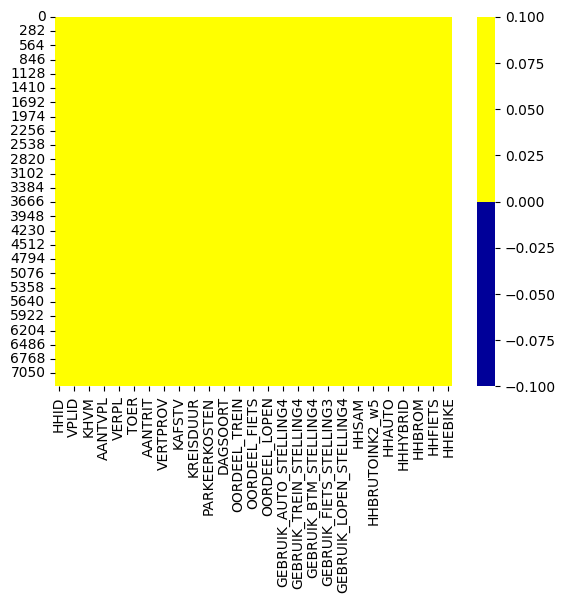

In [173]:
colours = ['#000099', '#ffff00'] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))


In [279]:
pd.set_option('display.max_columns', None)
pd.DataFrame(data.isnull().mean()).transpose()

,HHID,PERSID,VPLID,RitID,HH_VALID,P_VALID,KHVM,WEGGEWEEST,VERTREKP,AANTVPL,VPLDAGNR,VERPL,VERPLNR,TOER,TOER_TYPE,AANTRIT,KMOTIEF,VERTPROV,AANKPROV,KAFSTV,KVERTTIJD,KREISDUUR,ROLAUTO,PARKEERKOSTEN,VERTRAGING,DAGSOORT,OORDEEL_AUTO,OORDEEL_TREIN,OORDEEL_BTM,OORDEEL_FIETS,OORDEEL_BROMMER,OORDEEL_LOPEN,GEBRUIK_AUTO_STELLING3,GEBRUIK_AUTO_STELLING4,GEBRUIK_TREIN_STELLING3,GEBRUIK_TREIN_STELLING4,GEBRUIK_BTM_STELLING3,GEBRUIK_BTM_STELLING4,GEBRUIK_FIETS_STELLING2,GEBRUIK_FIETS_STELLING3,GEBRUIK_LOPEN_STELLING3,GEBRUIK_LOPEN_STELLING4,HHPERS,HHSAM,N_KIND,HHBRUTOINK2_w5,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Значит, у нас нет нулевых значений.

In [280]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
data.isna().sum().sum()

np.int64(0)

Значит, у нас нет пропущенных значений

После обработки данных, давайте ещё поделаем графики.

Например, можно взять способ передвижения в зависимости от уровня дохода.

* HHBRUTOINK2_w5 - Gross income household aggregated

In [307]:
# plt.figure(figsize=(16, 12))

# data_testirovanie = {
#     'income_group': ['<30K', '30-50K', '50-100K', '>100K'],
#     'Личный автомобиль (водитель)': [5, 35, 60, 75],
#     'Личный автомобиль (пассажир)': [10, 20, 15, 10],
#     'Общественный транспорт': [60, 35, 15, 5],
#     'Такси/каршеринг': [5, 5, 5, 5],
#     'Велосипед/самокат': [15, 3, 3, 2],
#     'Пешие прогулки': [5, 2, 2, 3]
# }
# df_aga = pd.DataFrame(data_testirovanie).set_index('income_group')

# plt.figure(figsize=(12, 7))

# # Построение stacked bar plot
# ax = df_aga.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', linewidth=0.7)

# # Настройки графика
# plt.title('Распределение способов передвижения по уровню дохода', fontsize=16, pad=20)
# plt.xlabel('Уровень дохода (руб./мес.)', fontsize=12)
# plt.ylabel('Доля респондентов (%)', fontsize=12)
# plt.xticks(rotation=0, ha='center')
# plt.legend(title='Способ передвижения', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()
# pd.DataFrame(data.groupby(['HHBRUTOINK2_w5', 'KHVM']).count()).plot(kind='bar', stacked=True, figsize=(10, 6))

# plt.title('Количество поездок по виду транспорта и задержке отправления')
# plt.ylabel('Количество поездок')
# plt.xlabel('Вид транспорта')
# plt.legend(title='Задержка отправления')
# plt.show()
# pd.DataFrame(data.groupby(['HHBRUTOINK2_w5', 'KHVM']).count())

In [ ]:
data

,HHID,PERSID,VPLID,RitID,KHVM,VERTREKP,AANTVPL,VPLDAGNR,VERPL,VERPLNR,...,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
0,30055622,3005562201,13957101,1395710101,2,2,2,1,3,1,...,3,1,0,0,1,0,0,1,0,1
1,30055622,3005562201,13957102,1395710201,2,2,2,1,3,2,...,3,1,0,0,1,0,0,1,0,1
2,30055622,3005562201,13957201,1395720101,1,2,4,2,3,1,...,3,1,0,0,1,0,0,1,0,1
3,30055622,3005562201,13957202,1395720201,1,2,4,2,3,2,...,3,1,0,0,1,0,0,1,0,1
4,30204076,3020407601,14445303,1444530301,8,1,3,3,3,3,...,2,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7305,30862294,3086229401,19042304,1904230401,2,2,12,3,1,4,...,1,1,0,0,0,0,0,1,0,0
7306,30862294,3086229401,19042103,1904210301,7,2,5,1,1,3,...,1,1,0,0,0,0,0,1,0,0
7307,30862294,3086229401,19042104,1904210401,7,2,5,1,1,4,...,1,1,0,0,0,0,0,1,0,0
7308,30862294,3086229401,19042201,1904220101,1,2,3,2,1,1,...,1,1,0,0,0,0,0,1,0,0


Можем удалить ID, так как они никак не влияют на выбор транспорта.

Но давайте сначала посмотрим соотношение задержки поездок в зависимости от транспорта. Это нам может пригодиться чуть позже при отборе фич.

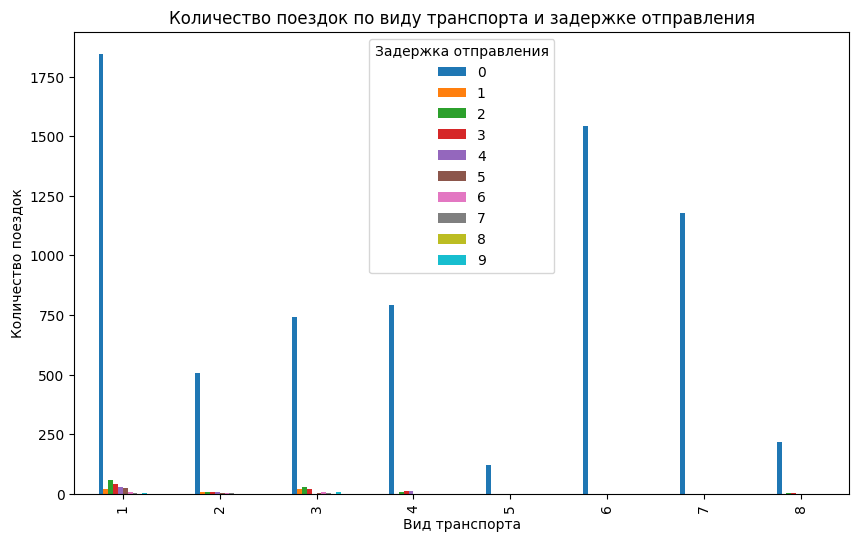

In [309]:
grouped = data.groupby(['KHVM', 'VERTRAGING'])['VPLID'].count().unstack()

grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Количество поездок по виду транспорта и задержке отправления')
plt.ylabel('Количество поездок')
plt.xlabel('Вид транспорта')
plt.legend(title='Задержка отправления')
plt.show()

In [178]:
data.drop('HHID', axis=1, inplace=True)
data.drop('PERSID', axis=1, inplace=True)
data.drop('VPLID', axis=1, inplace=True)
data.drop('RitID', axis=1, inplace=True)

Посмотрим, есть ли у нас не категориальные фичи.

In [179]:
data.max()

KHVM            8
VERTREKP        9
AANTVPL        13
VPLDAGNR        3
VERPL           5
               ..
HHBROM          1
HHSNOR          1
HHFIETS         1
HHVOUWFIETS     1
HHEBIKE         1
Length: 49, dtype: int64

VERTPROV и AANKPROV это кодировка регионов отправления и прибытия, а PARKEERKOSTEN является категориальной переменной

# Создание моделей

## Применение дополнительного условия

Я считаю, что именно на этом моменте следует применять дополнительное условие варианта, то есть "KAFSTV(Distance class trip) до 10 км"

In [180]:
data_desc[data_desc['Variable'] == 'KAFSTV']

,Variable,Var_description,Value,Label,Measurement_level,BaseData_Type,Name_BaseData,Filter_Variables
125,KAFSTV,Distance class trip,1,"0,1-0,5 km",Ordinal,Mobility,MPNWAVE6_DAGBOEKdata,1
126,KAFSTV,Distance class trip,2,0.5-1.0 km,Ordinal,Mobility,MPNWAVE6_DAGBOEKdata,1
127,KAFSTV,Distance class trip,3,1.0-2.5 km,Ordinal,Mobility,MPNWAVE6_DAGBOEKdata,1
128,KAFSTV,Distance class trip,4,2.5-3.7 km,Ordinal,Mobility,MPNWAVE6_DAGBOEKdata,1
129,KAFSTV,Distance class trip,5,3.7-5.0 km,Ordinal,Mobility,MPNWAVE6_DAGBOEKdata,1
...,...,...,...,...,...,...,...,...
133,KAFSTV,Distance class trip,9,15-20 km,Ordinal,Mobility,MPNWAVE6_DAGBOEKdata,1
134,KAFSTV,Distance class trip,10,20-30 km,Ordinal,Mobility,MPNWAVE6_DAGBOEKdata,1
135,KAFSTV,Distance class trip,11,30-40 km,Ordinal,Mobility,MPNWAVE6_DAGBOEKdata,1
136,KAFSTV,Distance class trip,12,40-50 km,Ordinal,Mobility,MPNWAVE6_DAGBOEKdata,1


До 10 км - значит первые 7 классов, так как классы тоже разделяются на значении 10.

In [181]:
data[data['KAFSTV'] < 8]['KAFSTV'].value_counts()

KAFSTV
3    1206
1     785
2     773
5     585
7     548
4     538
6     459
Name: count, dtype: int64

In [182]:
data.shape

(7310, 49)

In [183]:
data = data[data['KAFSTV'] < 8]

In [184]:
data.shape

(4894, 49)

## Отбор признаков

Как бы ни хотелось создать матрицу корреляции, к категориальным данным их применять неправильно. Так что придётся обойтись таблицей сопряжённости.

Точнее, я бы хотел это сделать, но не разобрался как её построить(

Давайте тогда посмотрим на важность наших признаков.

In [185]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.drop(columns='KHVM', axis=1)
y = data['KHVM']

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']
pd.set_option('display.max_rows', None)
print(featureScores.nlargest(40, 'Score'))

                      Specs        Score
14                  ROLAUTO  4704.588491
7                   AANTRIT  2364.862989
11                   KAFSTV  1669.334105
13                KREISDUUR  1410.341405
16               VERTRAGING  1077.260386
5                      TOER   689.291973
44                   HHSNOR   597.644434
15            PARKEERKOSTEN   502.699419
1                   AANTVPL   344.904577
8                   KMOTIEF   317.915961
36                   N_KIND   301.765388
3                     VERPL   256.871075
38                 HHAUTO_N   249.491446
34                   HHPERS   166.312469
6                 TOER_TYPE   164.574027
40                 HHBESTEL   161.841635
39                   HHAUTO   156.136571
4                   VERPLNR   142.714152
43                   HHBROM   141.919907
35                    HHSAM   140.650079
47                  HHEBIKE   104.873637
18             OORDEEL_AUTO    93.042713
9                  VERTPROV    86.726840
30  GEBRUIK_FIET

* KAFSTV - класс расстояния поездки

Звучит логично, что транспорт, который выберет человек, зависит от расстояния поездки. Эту фичу оставляем.

* ROLAUTO - роль человека в автосалоне (не машина, водитель или пассажир)

Если наша модель нужна для прогноза выбора ТС человеком, то мы не можем заранее знать, какую роль будет брать человек в автосалоне.

Так что предлагаю данный признак удалить.

In [186]:
X = X.drop(columns='ROLAUTO')

* AANTRIT - Number of trip segments per day

In [187]:
data['AANTRIT'].value_counts().sort_index()

AANTRIT
1    4193
2     100
3     423
4     104
5      40
6       6
7      28
Name: count, dtype: int64

Не могу точно сказать что это за фича, но полагаю, что она нам нужна, так что на всякий случай оставляем.

* KREISDUUR - класс длительности поездки

Давайте будем считать, что это время, за которое человек хочет преодолеть расстояние, если так обосновывать этот признок, то его можно будет оставить.

* PARKEERKOSTEN - класс платы за парковку

In [188]:
# data.groupby('PARKEERKOSTEN').nunique()
data[data['PARKEERKOSTEN'] == 0].groupby('KHVM').count()

,VERTREKP,AANTVPL,VPLDAGNR,VERPL,VERPLNR,TOER,TOER_TYPE,AANTRIT,KMOTIEF,VERTPROV,...,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
KHVM,,,,,,,,,,,,,,,,,,,,,
1,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,...,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192
2,301,301,301,301,301,301,301,301,301,301,...,301,301,301,301,301,301,301,301,301,301
3,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
4,509,509,509,509,509,509,509,509,509,509,...,509,509,509,509,509,509,509,509,509,509
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
6,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,...,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444
7,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,...,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159
8,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102


Как мы видим, цена за паркову не зависит от ТС, так что говорится о цене, как о факте того сколько стоит паркова, а не о том, сколько водитель потратил на паркову.

Значит, данный признак можно оставить.

* VERTRAGING - задержка поездки (delay)

In [189]:
pd.set_option('display.max_rows', 10)
data[data['VERTRAGING'] != 0]

,KHVM,VERTREKP,AANTVPL,VPLDAGNR,VERPL,VERPLNR,TOER,TOER_TYPE,AANTRIT,KMOTIEF,...,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
62,4,2,3,3,3,2,0,9,3,7,...,1,1,0,0,0,0,0,1,0,0
63,4,2,3,3,0,2,0,9,3,7,...,1,1,0,0,0,0,0,1,0,0
64,4,2,3,3,0,2,0,9,3,7,...,1,1,0,0,0,0,0,1,0,0
114,1,1,2,3,1,1,0,9,1,1,...,1,1,0,0,0,1,0,1,0,0
137,4,1,5,1,1,3,0,9,3,5,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,1,1,2,1,1,1,0,9,1,1,...,2,1,0,0,0,0,0,1,0,0
6115,1,1,5,1,1,4,0,9,1,9,...,2,1,0,0,0,0,0,1,0,0
6116,1,1,5,1,1,3,0,9,1,9,...,1,1,0,0,0,0,0,1,0,0
6343,8,1,8,1,1,3,0,9,1,2,...,4,1,1,1,0,1,0,1,0,0


Если интересно распределение задержек, то напомню, что график был построен выше, когда мы удаляли ID.

Всего у нас в 364 строчках была задержка, так что данная фича слабо повлияет на нашу модель.

,Features,Importances
11,KAFSTV,0.112396
7,AANTRIT,0.081316
13,KREISDUUR,0.053335
8,KMOTIEF,0.041784
1,AANTVPL,0.035662
...,...,...
41,HHMOTOR,0.003861
40,HHHYBRID,0.003666
39,HHBESTEL,0.003037
15,VERTRAGING,0.002657


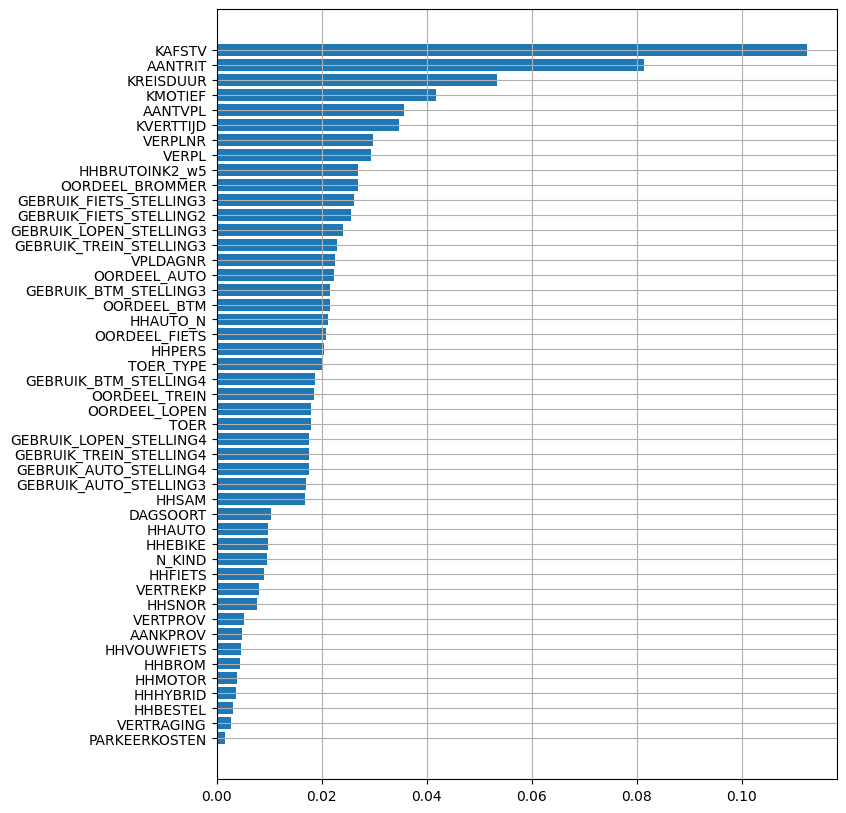

In [190]:
RFC = RandomForestClassifier(n_estimators=340)

RFC.fit(X, y)

importances = RFC.feature_importances_

# Создаем отдельный датасет для визуализации
tree_data = pd.DataFrame({"Features" : pd.DataFrame(X).columns, "Importances" : importances})
tree_data.set_index('Importances')

tree_data = tree_data.sort_values(by='Importances')

fig = plt.figure(figsize=(8, 10))
plt.barh(tree_data['Features'], tree_data['Importances'])
plt.grid(True)
tree_data.sort_values(by='Importances', ascending=False)

* VERPL - new trip

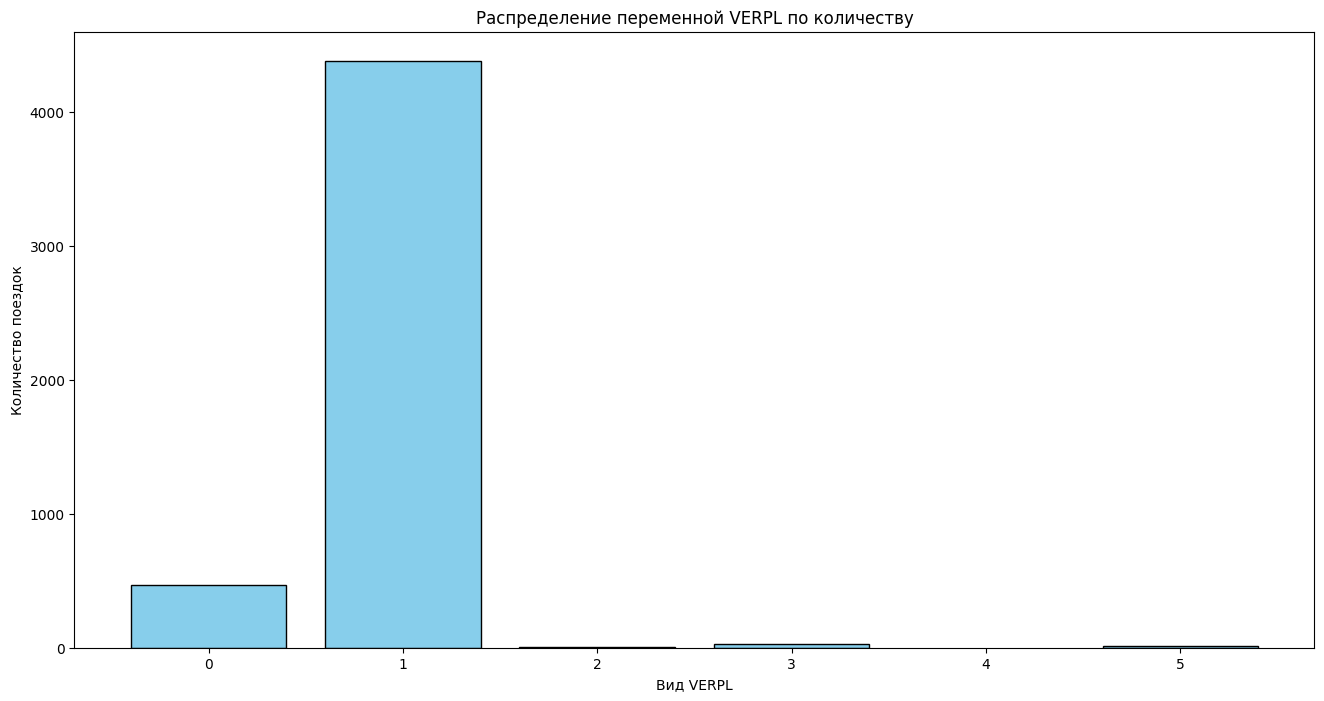

In [191]:
plt.figure(figsize=(16, 8))

verpl_count = data['VERPL'].value_counts()

plt.bar(verpl_count.index, verpl_count.values, color='skyblue', edgecolor='black')

plt.title('Распределение переменной VERPL по количеству')
plt.xlabel('Вид VERPL')
plt.ylabel('Количество поездок')
plt.show()

Не совсем понимаю смысл этой фичи

VERPL,New trip,0,no new trip,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1

VERPL,New trip,1,new trip,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1

VERPL,New trip,2,regular occupational trip,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1

VERPL,New trip,3,trip abroad,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1

VERPL,New trip,4,occupational trip by truck,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1

VERPL,New trip,5,vacation trip,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1

VERPL,New trip,6,multiple occupational trip,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1

VERPL,New trip,99,On this day the person did not take a trip,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1

In [192]:
print(f'VERPL = 0: \n {data[data['VERPL'] == 0]['KHVM'].value_counts()}')
print(f'VERPL = 1: \n {data[data['VERPL'] == 1]['KHVM'].value_counts()}')
print(f'VERPL = 3: \n {data[data['VERPL'] == 3]['KHVM'].value_counts()}')

VERPL = 0: 
 KHVM
4    358
3     34
1     32
8     17
6     15
2     11
7      3
5      1
Name: count, dtype: int64
VERPL = 1: 
 KHVM
6    1412
1    1185
7    1144
2     298
4     147
5      99
8      78
3      14
Name: count, dtype: int64
VERPL = 3: 
 KHVM
7    8
8    7
6    7
4    4
2    1
1    1
3    1
Name: count, dtype: int64


Я бы удалил эту фичу. Давайте попробуем потом какую-нибудь модель потренировать с ней и без неё и посмотрим результат.

## AutoML

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=52
)

In [194]:
import h2o
from h2o.automl import H2OAutoML

# Инициализация H2O
h2o.init()

data_frame = h2o.H2OFrame(data)

data_frame["KHVM"] = data_frame["KHVM"].asfactor()

# Определение целевой переменной
train, test = data_frame.split_frame(ratios=[0.7])
y3 = "KHVM"
X3 = train.columns
X3.remove(y3)

# Запуск AutoML
aml = H2OAutoML(max_models=10, seed=52)
aml.train(x=X3, y=y3, training_frame=train)

# Просмотр лучшей модели
print(aml.leaderboard)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,28 mins 55 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 13 days
H2O_cluster_name:,H2O_from_python_melni_kg03ja
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.074 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
04:02:50.74: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
model_id                                                  mean_per_class_error    logloss      rmse        mse
StackedEnsemble_BestOfFamily_1_AutoML_3_20250610_40250               0.0468254   0.131393  0.191384  0.0366279
StackedEnsemble_AllModels_1_AutoML_3_20250610_40250                  0.0492934   0.128175  0.18813   0.0353928
GBM_2_AutoML_3_20250610_40250                                        0.0645316   0.138039  0.191676  0.0367396
GBM_4_AutoML_3_20250610_40250                                        0.0667961   0.141059  0.192084  0.0368962
GBM_3_AutoML_3_20250610_40250                                        0.0670765   0.136035  0.190027  0.0361102
GBM_grid_1_AutoML_3_20250610_40250_model_1                           0.0733201   0

In [195]:
import h2o
from h2o.automl import H2OAutoML

# Инициализация H2O
h2o.init()

data_frame = h2o.H2OFrame(data)

data_frame = data_frame.asfactor()

# Определение целевой переменной
train, test = data_frame.split_frame(ratios=[0.7])
y3 = "KHVM"
X3 = train.columns
X3.remove(y3)

# Запуск AutoML
aml = H2OAutoML(max_models=10, seed=52)
aml.train(x=X3, y=y3, training_frame=train)

# Просмотр лучшей модели
print(aml.leaderboard)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,34 mins 39 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 13 days
H2O_cluster_name:,H2O_from_python_melni_kg03ja
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.102 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
04:08:34.708: AutoML: XGBoost is not available; skipping it.
04:08:34.884: GLM_1_AutoML_4_20250610_40834 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException

██████████████████████████████████████████████████████████████| (done) 100%
model_id                                                  mean_per_class_error    logloss      rmse        mse
StackedEnsemble_BestOfFamily_1_AutoML_4_20250610_40834               0.0514662   0.137513  0.193514  0.0374475
StackedEnsemble_AllModels_1_AutoML_4_20250610_40834                  0.0532474   0.132561  0.189493  0.0359075
DeepLearning_grid_1_AutoML_4_20250610_40834_model_1                  0.0569604   0.186493  0.20876   0.0435808
GBM_1_AutoML_4_20250610_40834                                        0.0747908   0.158323  0.204971  0.042013
GBM_2_AutoML_4_20250610_40834                                        0.0799183   0.15770

In [196]:
print(aml.leader)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_4_20250610_40834


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/4
# GBM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           2/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0005930117353312004
RMSE: 0.024351832278725977
LogLoss: 0.008341928315717033
Null degrees of freedom: 3416
Residual degrees of freedom: 3352
Null deviance: 11407.237134940477
Resid

In [197]:
perf = aml.leader.model_performance(test)
print(perf)

ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.031186190084739888
RMSE: 0.17659612137513067
LogLoss: 0.11029416836362745
Null degrees of freedom: 1476
Residual degrees of freedom: 1412
Null deviance: 4885.644172551344
Residual deviance: 325.80897334615184
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
1    2    3    4    5    6    7    8    Error      Rate
---  ---  ---  ---  ---  ---  ---  ---  ---------  ----------
373  0    0    0    0    0    0    0    0          0 / 373
0    98   0    0    0    0    0    0    0          0 / 98
0    0    15   0    0    0    0    0    0          0 / 15
0    0   

Я сдаюсь. Этого монстра невозможно будет победить.

Ладно, надо попытаться хотя бы приблизиться к получивемуся показателю.

In [198]:
# from pycaret.classification import *

# setup(data, target="KHVM")
# best_model = compare_models()

## Мои модели

### CatBoost

In [199]:
cb = CatBoostClassifier(auto_class_weights="Balanced", random_state=52)
cb.fit(X_train, y_train, verbose=False)
print(cb.score(X_test, y_test))

y_cb_pred = cb.predict(X_test)
print(classification_report(y_test, y_cb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_cb_pred))

0.8386657590197413
              precision    recall  f1-score   support

           1       0.82      0.75      0.78       386
           2       0.64      0.57      0.60       100
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00       160
           5       0.90      0.96      0.93        28
           6       0.81      0.85      0.83       428
           7       0.86      0.91      0.88       325
           8       0.88      0.81      0.84        26

    accuracy                           0.84      1469
   macro avg       0.86      0.86      0.86      1469
weighted avg       0.84      0.84      0.84      1469

Confusion Matrix:
 [[291  23   0   0   1  53  15   3]
 [ 26  57   0   0   0   9   8   0]
 [  0   0  16   0   0   0   0   0]
 [  0   0   0 160   0   0   0   0]
 [  0   0   0   0  27   0   1   0]
 [ 29   7   0   0   2 364  26   0]
 [  9   1   0   0   0  19 296   0]
 [  2   1   0   0   0   2   0  21]]


Также вспомним, что мы хотели убрать признак VERPL и посмотреть какой результат даст модель без неё.

In [ ]:
cb2 = CatBoostClassifier(
    auto_class_weights="Balanced", 
    random_state=52)
cb2.fit(X_train, y_train, verbose=False)
print(cb2.score(X_test, y_test))

y_cb2_pred = cb2.predict(X_test)
print(classification_report(y_test, cb2.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_cb2_pred))

0.8509189925119128
              precision    recall  f1-score   support

           1       0.82      0.79      0.81       386
           2       0.79      0.45      0.57       100
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00       160
           5       1.00      0.86      0.92        28
           6       0.81      0.89      0.85       428
           7       0.86      0.91      0.89       325
           8       1.00      0.73      0.84        26

    accuracy                           0.85      1469
   macro avg       0.91      0.83      0.86      1469
weighted avg       0.85      0.85      0.85      1469

Confusion Matrix:
 [[306  12   0   0   0  53  15   0]
 [ 31  45   0   0   0  15   9   0]
 [  0   0  16   0   0   0   0   0]
 [  0   0   0 160   0   0   0   0]
 [  1   0   0   0  24   2   1   0]
 [ 22   0   0   0   0 383  23   0]
 [  9   0   0   0   0  19 297   0]
 [  4   0   0   0   0   3   0  19]]


Как мы видим, признак VERPL особо не влияет на нашу модель(результаты оказались незначительно лучше), так что давайте его оставим.

In [201]:
cb2.get_feature_importance(prettified=True)

,Feature Id,Importances
0,AANTRIT,11.830420
1,KAFSTV,9.498124
2,KREISDUUR,5.677805
3,OORDEEL_BROMMER,5.646230
4,KMOTIEF,4.138450
...,...,...
42,HHHYBRID,0.125995
43,VERTPROV,0.117275
44,TOER,0.094898
45,HHMOTOR,0.072969


cb2 показал лучше результаты.

In [202]:
y_pred_proba = cb2.predict_proba(X_test)
loss = log_loss(y_test, y_pred_proba)
print(f'loss: {loss}')

loss: 0.46417890670550493


### Случайный лес

In [203]:
rf = RandomForestClassifier(random_state=52)

rf_scores = cross_val_score(rf, X, y, cv=5)
print("Scores:", rf_scores)
print("Mean score:", rf_scores.mean())

rf.fit(X_train, y_train)

f1 = f1_score(y_test, rf.predict(X_test), average="macro")
print(f"F1-score: {f1}")

Scores: [0.6741573  0.59754852 0.659857   0.60878447 0.65030675]
Mean score: 0.6381308083245079
F1-score: 0.8593526064098908


In [204]:
rf2 = RandomForestClassifier(class_weight='balanced', random_state=52)

rf2_scores = cross_val_score(rf2, X, y, cv=5)
print("Scores:", rf2_scores)
print("Mean score:", rf2_scores.mean())

rf2.fit(X_train, y_train)

f1 = f1_score(y_test, rf2.predict(X_test), average="macro")
print(f"F1-score: {f1}")

Scores: [0.64759959 0.57711951 0.61695608 0.56996936 0.61451943]
Mean score: 0.6052327925285808
F1-score: 0.8671337750440891


Попробуем Случайный лес с использованием optuna

In [205]:
import optuna

def objective(trial):
   
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'class_weight': 'balanced'  # Учет дисбаланса классов
    }
    
    model = RandomForestClassifier(**params, random_state=52)
    
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    
    return scores.mean()

study = optuna.create_study(direction='maximize')  # Максимизируем F1-score
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params)
print("Лучший F1-score:", study.best_value)

[I 2025-06-10 04:14:23,636] A new study created in memory with name: no-name-74bf8ce5-bdbc-4ae2-93fe-b37bdeab84f0
[I 2025-06-10 04:14:26,580] Trial 0 finished with value: 0.388300050338402 and parameters: {'n_estimators': 191, 'max_depth': 5, 'min_samples_split': 0.3231388450869957}. Best is trial 0 with value: 0.388300050338402.
[I 2025-06-10 04:14:27,788] Trial 1 finished with value: 0.37366755444252187 and parameters: {'n_estimators': 85, 'max_depth': 3, 'min_samples_split': 0.4702218151939641}. Best is trial 0 with value: 0.388300050338402.
[I 2025-06-10 04:14:28,650] Trial 2 finished with value: 0.019180655399065764 and parameters: {'n_estimators': 83, 'max_depth': 15, 'min_samples_split': 0.9223037203501162}. Best is trial 0 with value: 0.388300050338402.
[I 2025-06-10 04:14:30,548] Trial 3 finished with value: 0.014903828107301492 and parameters: {'n_estimators': 199, 'max_depth': 8, 'min_samples_split': 0.9893561162930596}. Best is trial 0 with value: 0.388300050338402.
[I 2025

Лучшие параметры: {'n_estimators': 104, 'max_depth': 18, 'min_samples_split': 0.10047672118899613}
Лучший F1-score: 0.46310504499300065


rf показал лучшие результаты.

### Логистическая регрессия

In [206]:
lr = LogisticRegression(penalty='l2', solver='saga', max_iter=1000, random_state=52, class_weight='balanced')

lr_scores = cross_val_score(lr, X, y, cv=5)
print("Scores:", lr_scores)
print("Mean score:", lr_scores.mean())

lr.fit(X_train, y_train)

y_lr_pred = lr.predict(X_test)
f1 = f1_score(y_test, y_lr_pred, average='macro')
print(f"F1-score: {f1}")
y_lr_pred_proba = lr.predict_proba(X_test)
loss = log_loss(y_test, y_lr_pred_proba)
print(f'loss: {loss}')

d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_ite

Scores: [0.48212462 0.56588355 0.61491318 0.5546476  0.57361963]
Mean score: 0.5582377159615735
F1-score: 0.6083523379769296
loss: 0.9799043120096029


d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [207]:
lr2 = LogisticRegression(class_weight='balanced')

parameters = {'penalty': ('l1', 'l2'),
              'C': [1, 5],
              'solver': ('lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
              'class_weight': ['balanced']}

lr2 = GridSearchCV(lr2, parameters)
lr2.fit(X_train, y_train)

lr2.score(X_test, y_test)

y_lr2_pred = lr2.predict(X_test)
f1 = f1_score(y_test, y_lr2_pred, average='macro')
print(f"F1-score: {f1}")
y_lr2_pred_proba = lr2.predict_proba(X_test)
loss = log_loss(y_test, y_lr2_pred_proba)
print(f'loss: {loss}')

print(lr2.best_estimator_, lr2.best_params_)

d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_ite

F1-score: 0.6570584990724182
loss: 0.9355829743416809
LogisticRegression(C=5, class_weight='balanced', solver='newton-cg') {'C': 5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}


lr2 показала лучше результаты.

### Стэкинг

In [208]:
estimators = [
    ('CatBoost', CatBoostClassifier(auto_class_weights="Balanced", random_state=52)),
    ('RandomForest', RandomForestClassifier(class_weight='balanced', random_state=52)),
    ('LogisticRegression', LogisticRegression(C=5, class_weight='balanced', solver='newton-cholesky'))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stack.fit(X_train, y_train)

y_stack_pred = stack.predict(X_test)
f1 = f1_score(y_test, y_stack_pred, average='macro')
print(f"F1-score: {f1}")
y_stack_pred_proba = stack.predict_proba(X_test)
loss = log_loss(y_test, y_stack_pred_proba)
print(f'loss: {loss}')

Learning rate set to 0.084254
0:	learn: 1.9617237	total: 10.2ms	remaining: 10.2s
1:	learn: 1.8291015	total: 19.5ms	remaining: 9.75s
2:	learn: 1.7565435	total: 28.4ms	remaining: 9.45s
3:	learn: 1.6957857	total: 38.4ms	remaining: 9.55s
4:	learn: 1.6223520	total: 47.6ms	remaining: 9.48s
5:	learn: 1.5608547	total: 56.8ms	remaining: 9.4s
6:	learn: 1.4950469	total: 65.8ms	remaining: 9.33s
7:	learn: 1.4438480	total: 75ms	remaining: 9.3s
8:	learn: 1.3920464	total: 84.6ms	remaining: 9.31s
9:	learn: 1.3520884	total: 93.7ms	remaining: 9.27s
10:	learn: 1.3098783	total: 102ms	remaining: 9.21s
11:	learn: 1.2804385	total: 112ms	remaining: 9.2s
12:	learn: 1.2624166	total: 121ms	remaining: 9.17s
13:	learn: 1.2361948	total: 126ms	remaining: 8.89s
14:	learn: 1.2080001	total: 137ms	remaining: 8.98s
15:	learn: 1.1837232	total: 147ms	remaining: 9.06s
16:	learn: 1.1588566	total: 157ms	remaining: 9.08s
17:	learn: 1.1330507	total: 167ms	remaining: 9.09s
18:	learn: 1.1163062	total: 176ms	remaining: 9.1s
19:	lea

## Сравнение результатов

In [209]:
results = []

cb = cb2
rf = rf2
lr = lr2

# ------------------------------------------------------------------
# CatBoostClassifier

y_pred = cb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
loss = log_loss(y_test, cb.predict_proba(X_test))

results.append(['CatBoost', accuracy, precision, recall, f1, loss])

# ------------------------------------------------------------------
# RandomForest

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
loss = log_loss(y_test, rf.predict_proba(X_test))

results.append(['RandomForest', accuracy, precision, recall, f1, loss])

# ------------------------------------------------------------------
# LogisticRegression

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
loss = log_loss(y_test, lr.predict_proba(X_test))

results.append(['LogisticRegression', accuracy, precision, recall, f1, loss])

# ------------------------------------------------------------------
# Stacking

y_pred = stack.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
loss = log_loss(y_test, stack.predict_proba(X_test))

results.append(['Stacking', accuracy, precision, recall, f1, loss])

# ------------------------------------------------------------------

results_df = pd.DataFrame(results, columns=['Model', 'accuracy', 'precision', 'recall', 'f1', 'logloss'])
results_df

,Model,accuracy,precision,recall,f1,logloss
0,CatBoost,0.838666,0.862548,0.857138,0.858973,0.464179
1,RandomForest,0.860449,0.905085,0.844217,0.867134,0.525030
2,LogisticRegression,0.637849,0.629339,0.750049,0.657058,0.935583
3,Stacking,0.870660,0.911261,0.861240,0.880948,0.396613


In [ ]:
perf = aml.leader.model_performance(test)

results_df = pd.concat([results_df, pd.DataFrame([{'Model': 'H2O AutoML', 
                                                'accuracy': 'неизвестно',
                                                'precision': 'неизвестно',
                                                'recall': 'неизвестно',
                                                'f1': 'неизвестно',
                                                'logloss': perf.logloss()
                                                }])])
results_df

,Model,accuracy,precision,recall,f1,logloss
0,CatBoost,0.838666,0.862548,0.857138,0.858973,0.464179
1,RandomForest,0.860449,0.905085,0.844217,0.867134,0.525030
2,LogisticRegression,0.637849,0.629339,0.750049,0.657058,0.935583
3,Stacking,0.87066,0.911261,0.86124,0.880948,0.396613
0,H2O AutoML,неизвестно,неизвестно,неизвестно,неизвестно,0.110294


Как мы видим, стэкинг больше других моделей смог приблизиться к результату AutoML. Хоть результат и далёк от идеала, всё равно получилось достаточно познавательно делать курсовую работу.

# Интерпретация

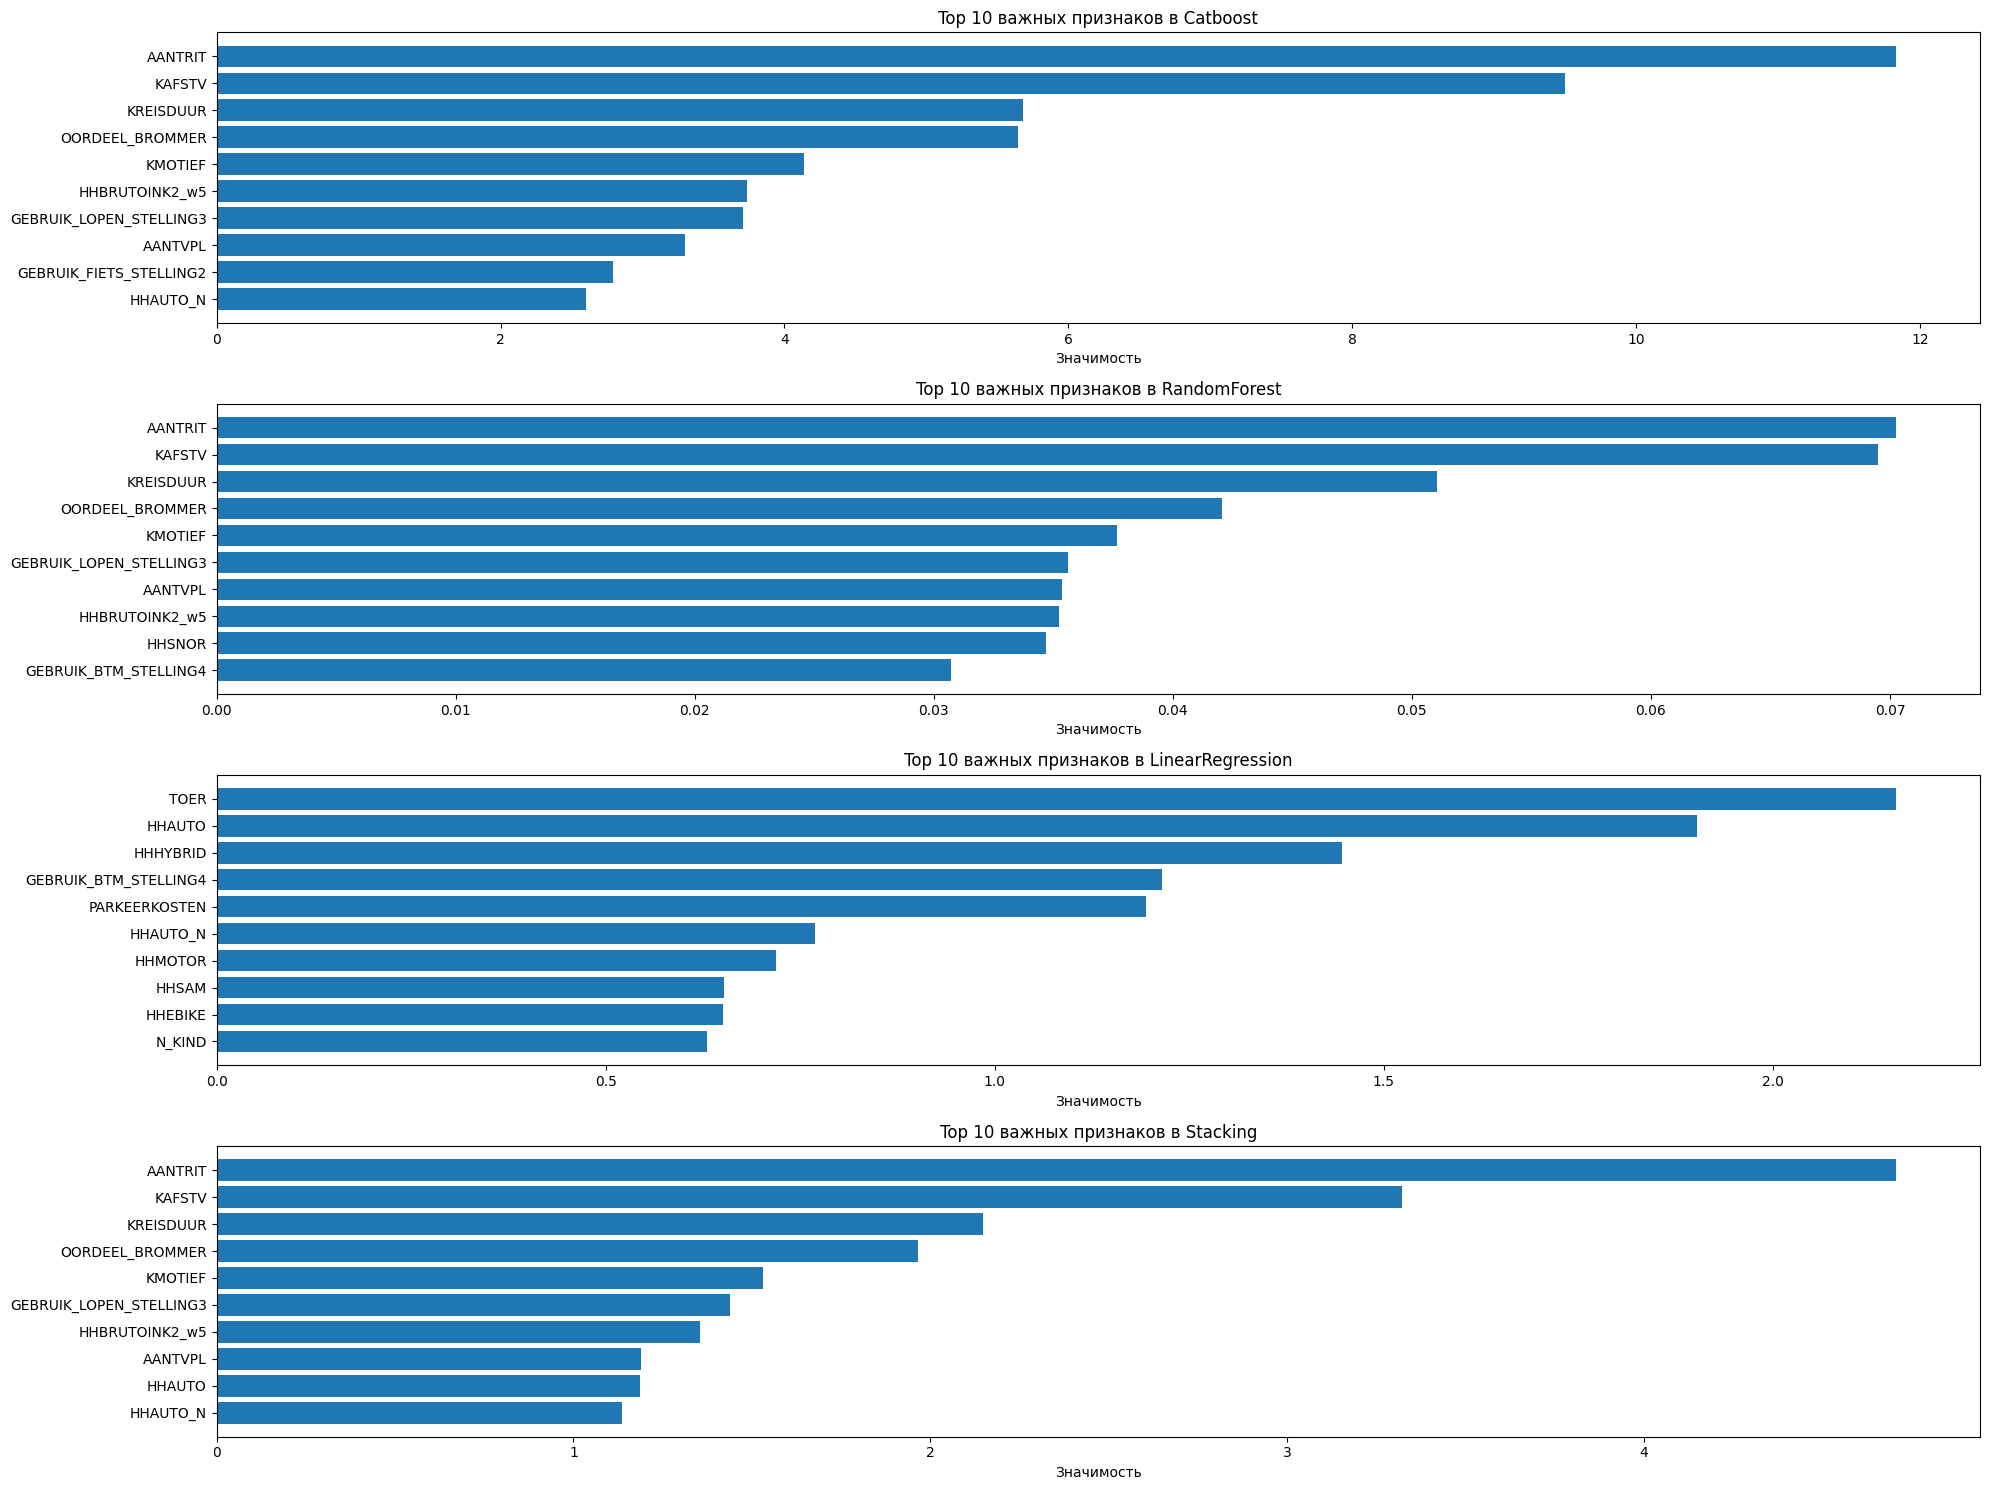

In [211]:
# CatBoost: Важность признаков
feature_importance_cb = cb.get_feature_importance(
    type='PredictionValuesChange' 
)
feature_names_cb = cb.feature_names_

importance_df_cb = pd.DataFrame({
    'Feature': feature_names_cb,
    'Importance': feature_importance_cb
}).sort_values('Importance', ascending=False).head(10)


feature_names = X_train.columns.tolist()

# RandomForest: Важность признаков
feature_importance_rf = rf.feature_importances_
feature_names_rf = [f"Feature {i}" for i in range(X_train.shape[1])]

importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_rf
}).sort_values('Importance', ascending=False).head(10)


# LogisticRegression: Важность признаков
feature_importance_lr = lr.best_estimator_.coef_[0]
feature_names_lr = [f"Feature {i}" for i in range(X_train.shape[1])] 

importance_df_lr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_lr
}).sort_values('Importance', ascending=False).head(10)


# Получаем важность признаков от каждой базовой модели
feature_importances = []
for name, model in stack.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances.append(model.feature_importances_)
    elif hasattr(model, 'coef_'):
        # Для линейных моделей используем абсолютные значения коэффициентов
        feature_importances.append(np.abs(model.coef_[0]))

average_importance = np.mean(feature_importances, axis=0) # Усредняем важности

importance_df_stack = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': average_importance
}).sort_values('Importance', ascending=False).head(10)

# -----------------------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(4, 1, figsize=(20, 15))


# График для CatBoost
axes[0].barh(importance_df_cb['Feature'], importance_df_cb['Importance'])
axes[0].set_title('Top 10 важных признаков в Catboost')
axes[0].set_xlabel('Значимость')
axes[0].invert_yaxis()  # Самые важные сверху

# График для RandomForest
axes[1].barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
axes[1].set_title('Top 10 важных признаков в RandomForest')
axes[1].set_xlabel('Значимость')
axes[1].invert_yaxis()

# График для LinearRegression
axes[2].barh(importance_df_lr['Feature'], importance_df_lr['Importance'])
axes[2].set_title('Top 10 важных признаков в LinearRegression')
axes[2].set_xlabel('Значимость')
axes[2].invert_yaxis()

# График для Stacking
axes[3].barh(importance_df_stack['Feature'], importance_df_stack['Importance'])
axes[3].set_title('Top 10 важных признаков в Stacking')
axes[3].set_xlabel('Значимость')
axes[3].invert_yaxis()

plt.tight_layout()  # Предотвращает перекрывание графиков
plt.show()

Обратите внимание, что данные графики показывают лишь сравнение влияния фичей для каждой модели отдельно. Масштаб осей разный.

### Глобальная

Рассматривает работу модели в целом. Она показывает, какие факторы в целом оказывают наибольшее влияние на структуру модели и её предсказания.

In [212]:
print("CatBoost Feature Importance:")
display(eli5.show_weights(cb, feature_names=X_train.columns.tolist()))

print("Random forest feature importance:")
display(eli5.show_weights(rf, feature_names=X_train.columns.tolist()))

print("Logistic regression feature importance:")
display(eli5.show_weights(lr.best_estimator_, feature_names=X_train.columns.tolist()))

# # Базовые модели
# print("Stacking feature importance:")
# for name, estimator in stack.named_estimators_.items():
#     print(f"\n{name}:")
#     try:
#         display(eli5.show_weights(estimator, feature_names=X_train.columns.tolist()))
#     except:
#         print(f"Feature importance not available for {name}")

# print("\nFinal estimator:")
# display(eli5.show_weights(stack.final_estimator_, feature_names=X_train.columns.tolist()))

CatBoost Feature Importance:


Weight,Feature
0.1183,AANTRIT
0.0950,KAFSTV
0.0568,KREISDUUR
0.0565,OORDEEL_BROMMER
0.0414,KMOTIEF
0.0373,HHBRUTOINK2_w5
0.0371,GEBRUIK_LOPEN_STELLING3
0.0330,AANTVPL
0.0279,GEBRUIK_FIETS_STELLING2
0.0260,HHAUTO_N


Random forest feature importance:


Weight,Feature
0.0702 ± 0.0701,AANTRIT
0.0695 ± 0.0324,KAFSTV
0.0511 ± 0.0455,KREISDUUR
0.0420 ± 0.0397,OORDEEL_BROMMER
0.0376 ± 0.0231,KMOTIEF
0.0356 ± 0.0513,GEBRUIK_LOPEN_STELLING3
0.0354 ± 0.0232,AANTVPL
0.0352 ± 0.0430,HHBRUTOINK2_w5
0.0347 ± 0.0419,HHSNOR
0.0307 ± 0.0408,GEBRUIK_BTM_STELLING4


Logistic regression feature importance:


## Локальная

Фокусируется на конкретном примере. Она объясняет, почему модель приняла то или иное решение для конкретного объекта. 

d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


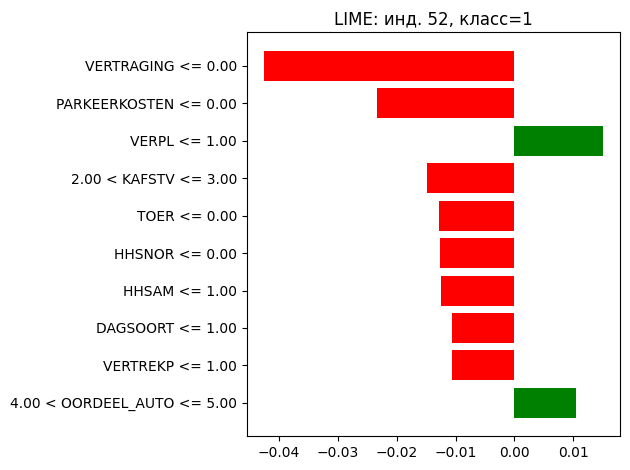

In [318]:
# Создаем explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train),
    feature_names = X_train.columns.tolist(),
    class_names = ['машина-водитель', 'машина-пассажир', 'поезд', 'автобус/трамвай/метро',
                                'скутер', 'велосипед', 'пешком', 'другое'],
    mode = 'classification',
    discretize_continuous = True
)

# Выбираем случайный пример для объяснения
idx = 52
instance = X_test.iloc[idx].values

# Генерируем объяснение
exp = explainer.explain_instance(
    data_row = instance,
    predict_fn = stack.predict_proba,  # Функция предсказания вероятностей
    num_features = 10
)

# Визуализируем
fig = exp.as_pyplot_figure()
true_c = y_test.iloc[idx]
plt.title(f"LIME: инд. {idx}, класс={true_c}")
plt.tight_layout()
# plt.savefig('explainer.png')
plt.show()

In [319]:
pd.DataFrame(pd.concat([pd.Series(X_test.iloc[idx]), pd.Series(y_test.iloc[idx])])).transpose()
print(stack.predict(pd.DataFrame(X_test.iloc[idx]).transpose()), y_test.iloc[idx])

[1] 1


d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


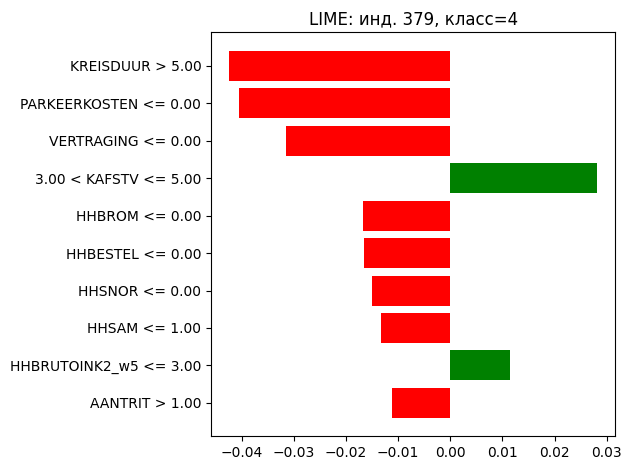

In [325]:
idx = 379
instance = X_test.iloc[idx].values

exp = explainer.explain_instance(
    data_row = instance,
    predict_fn = stack.predict_proba,
    num_features = 10
)

fig = exp.as_pyplot_figure()
true_c = y_test.iloc[idx]
plt.title(f"LIME: инд. {idx}, класс={true_c}")
plt.tight_layout()
plt.savefig('explainer2.png')
plt.show()

In [326]:
pd.DataFrame(pd.concat([pd.Series(X_test.iloc[idx]), pd.Series(y_test.iloc[idx])])).transpose()
print(stack.predict(pd.DataFrame(X_test.iloc[idx]).transpose()), y_test.iloc[idx])

[4] 4


d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Уник\АВИШ\4 семестр\ML\Курсовая работа\Melnikov Ivan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


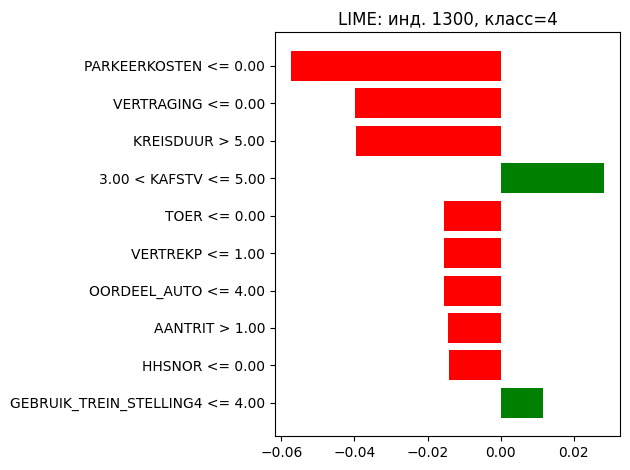

In [328]:
idx = 1300
instance = X_test.iloc[idx].values

exp = explainer.explain_instance(
    data_row = instance,
    predict_fn = stack.predict_proba,  
    num_features = 10
)

fig = exp.as_pyplot_figure()
true_c = y_test.iloc[idx]
plt.title(f"LIME: инд. {idx}, класс={true_c}")
plt.tight_layout()
plt.savefig('explainer3.png')
plt.show()

In [329]:
pd.DataFrame(pd.concat([pd.Series(X_test.iloc[idx]), pd.Series(y_test.iloc[idx])])).transpose()
print(stack.predict(pd.DataFrame(X_test.iloc[idx]).transpose()), y_test.iloc[idx])

[4] 4


Ах да, и напоследок. Объяснение automl.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_4_20250610_40834,0.0346701,0.110294,0.176596,0.0311862,22558,0.490665,StackedEnsemble
DeepLearning_grid_1_AutoML_4_20250610_40834_model_1,0.0352884,0.160583,0.189361,0.0358577,10232,0.090748,DeepLearning
StackedEnsemble_AllModels_1_AutoML_4_20250610_40834,0.0359971,0.106746,0.173779,0.0301992,81065,0.52276,StackedEnsemble
GBM_3_AutoML_4_20250610_40834,0.0509895,0.128205,0.186912,0.0349361,1867,0.361848,GBM
GBM_5_AutoML_4_20250610_40834,0.0548339,0.132116,0.188828,0.0356558,1495,0.267906,GBM
GBM_2_AutoML_4_20250610_40834,0.0550575,0.132673,0.191542,0.0366884,1688,0.53662,GBM
DRF_1_AutoML_4_20250610_40834,0.0584513,0.242854,0.240128,0.0576613,1323,0.361196,DRF
GBM_4_AutoML_4_20250610_40834,0.0590874,0.130684,0.187451,0.0351378,2335,0.528164,GBM
GBM_grid_1_AutoML_4_20250610_40834_model_1,0.063788,0.132179,0.19672,0.0386986,2438,0.758428,GBM
GBM_1_AutoML_4_20250610_40834,0.0638498,0.122731,0.186793,0.0348916,3279,0.540173,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_4_20250610_40834

1,2,3,4,5,6,7,8,Error,Rate
373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 373
0.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 98
0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 15
0.0,0.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0 / 135
0.0,0.0,0.0,0.0,24.0,2.0,0.0,0.0,0.0769231,2 / 26
0.0,0.0,0.0,0.0,0.0,408.0,29.0,1.0,0.0684932,30 / 438
0.0,0.0,0.0,0.0,1.0,24.0,335.0,0.0,0.0694444,25 / 360
0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,0.0625,2 / 32
373.0,98.0,15.0,135.0,25.0,435.0,365.0,31.0,0.0399458,59 / 1 477


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

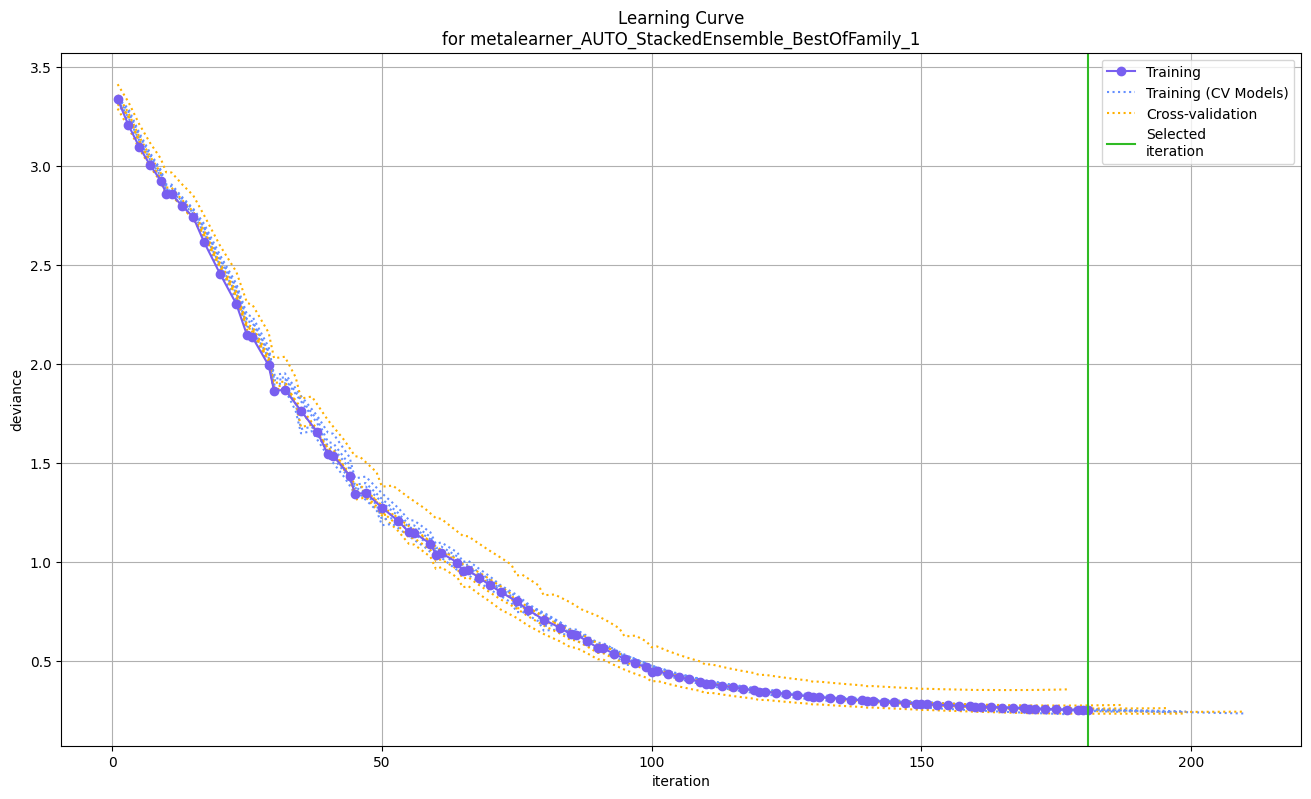

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

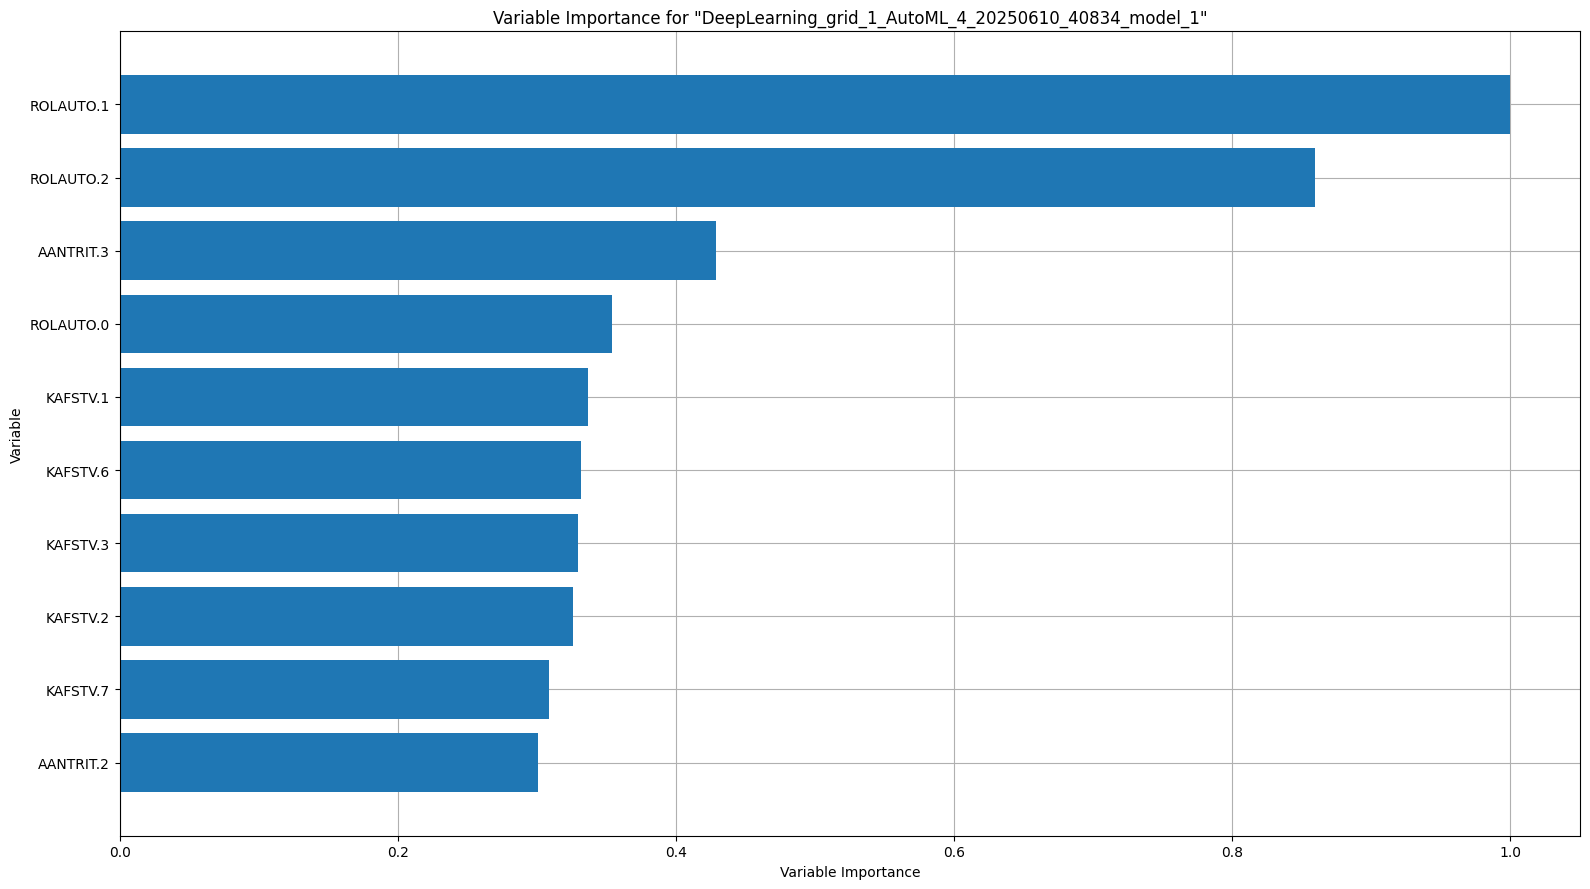

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

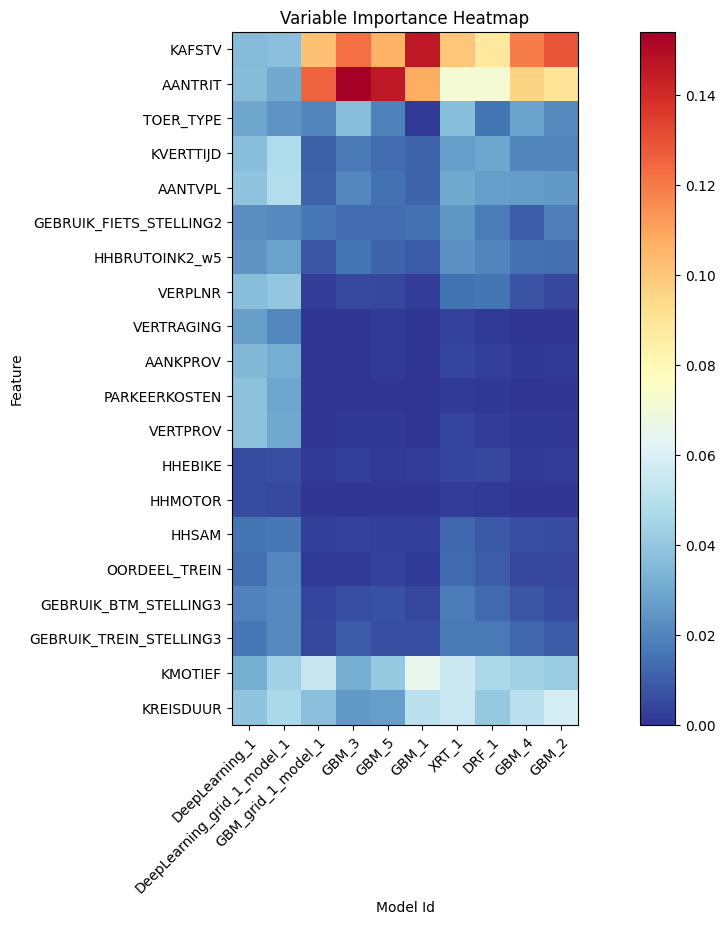

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

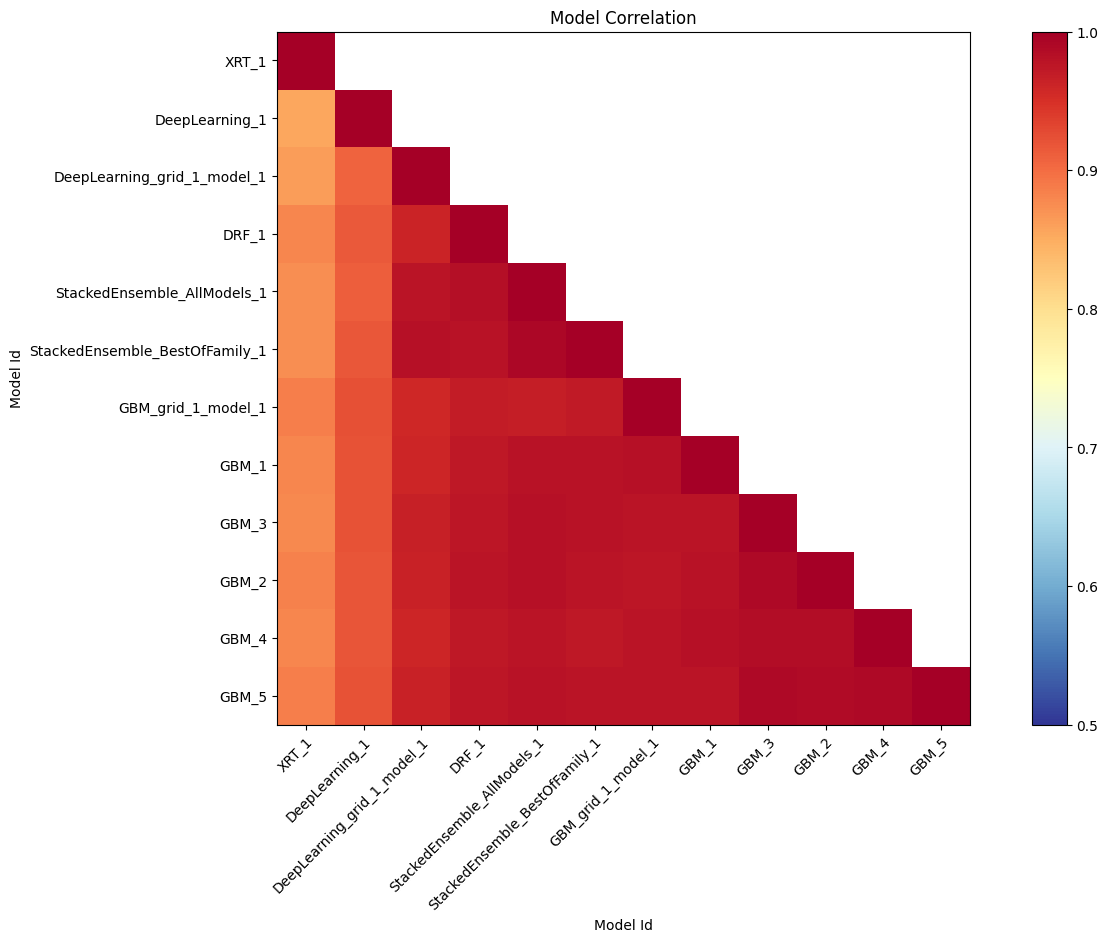

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Incorrect number of arguments; 'cols_py' expects 2 but was passed 3
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_359_sid_a296 (levels (tmp= py_358_sid_a296 (as.factor (cols_py py_357_sid_a296 np.str_('AANTVPL'))))))", 'session_id': '_sid_a296'}


<Figure size 1600x900 with 0 Axes>

In [330]:
aml.explain(test)